# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you `the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.`

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

This dataset has 15 columns and 340 rows.

In [4]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

There are 4 features in object dtypes, 7 features in float and 4 in int.

In [6]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

There is no duplicated observation.

In [7]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

There is no missing value.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


<IPython.core.display.Javascript object>

* The mean for current price is 80 dollars with 98 dollars as standard division. Minimum price is 4.5 dollars and maximum is 127 dollars with 60 dollars as median.
* For Volatility, mean is 1.5 with 1.4 at median with 75th Percentile at 1.7. Minimum is 1.0 and maximun is 4.6. It means that marjority of stocks are less volatile.
* Net income has a range from -1.1B to 2.4B with a mean of 149.4M 70.7M (unit in dollar).
* ROE has a mean of 39.59 and a median of 15.00 with a range from 1.00 to 917.00 (unit in dollar)
* Earning Per Share has a range form -0.61 to 50.09 with 2.78 as mean and 2.90 as median (unit in dollar)

In [9]:
# to create a copy of the dataframe
df = data.copy()

<IPython.core.display.Javascript object>

In [10]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

# fixing column names
df.columns = [c.replace("/", "_") for c in df.columns]

# recalling the dataframe to check on column names
df.sample(n=10, random_state=1)

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [11]:
# Let's check unique values

# creating a new dataframe
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker_Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

<IPython.core.display.Javascript object>

* There are 11 GICS Sectors such as Industrials, Health Care, and Information Technology etc.
* The rest of values in features seem to have an unique value.
* We will drop "Ticker_Symbol" and "GICS_Sub_Industry" columns because they won't provide insight when we build models.

In [12]:
# dropping columns and recalling dataframe to check if the change has been made

df = df.drop(["Ticker_Symbol", "GICS_Sub_Industry"], axis=1)
df.sample(n=10, random_state=1)

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
102,Devon Energy Corp.,Energy,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,Facebook,Information Technology,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,Apartment Investment & Mgmt,Real Estate,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,Procter & Gamble,Consumer Staples,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,Occidental Petroleum,Energy,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,Yum! Brands Inc,Consumer Discretionary,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT Corporation,Energy,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,Halliburton Co.,Energy,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,Discover Financial Services,Financials,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,Invesco Ltd.,Financials,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

## Univariate

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 1. What does the distribution of stock prices look like?

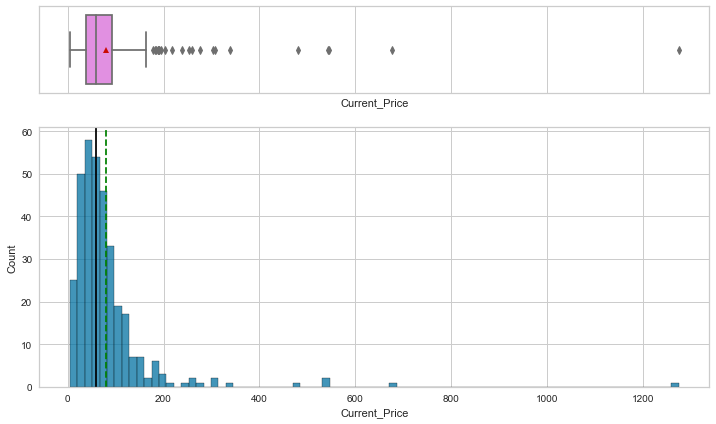

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "Current_Price")

* The distribution od stock prices is heavily right skewed with the outliers greater than 1200 dollars. 
* Its mean is around 80 dollars with lower meadian as around 60 dollars.
* We will decide how to handle outliers in Data Processing session.

### Price Change

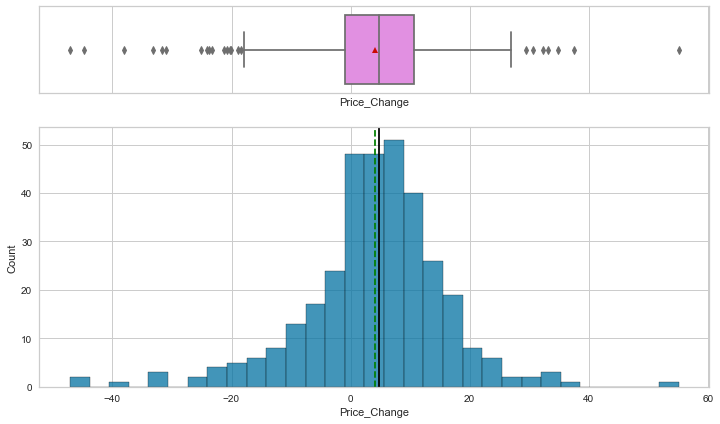

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Price_Change")

* Price change shows some similarities with a normal bell shape distribution.
* Mean, ~4 dollars, is slightly lower than median, ~5 dollars.
* It has lots of outliers both lower whisker and upper whisker.
* We decided to keep outliers because they are the real data and there are a lot of them.

### Volatility

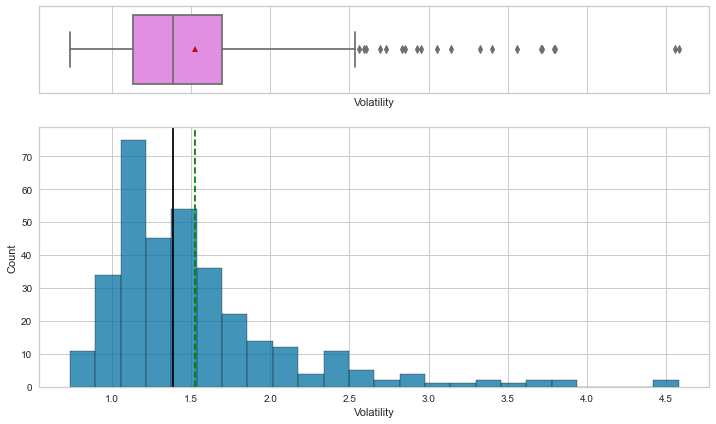

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Volatility")

* Volatility has a great right skewed distribution with lots of outliers. 
* Mean is higher than median.
* We decided to keep outliers because they reflect the actual data.

### ROE

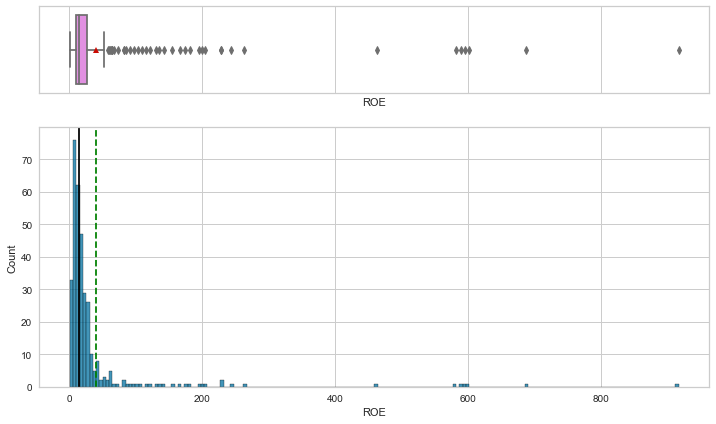

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "ROE")

* ROE has an extremely right skewed distribution with outliers. 
* The highest outlier is over 900 and the upperwhisker is ~60, a very large range of outliers.
* We will make a decision how to handle outliers.

### Cash Ratio

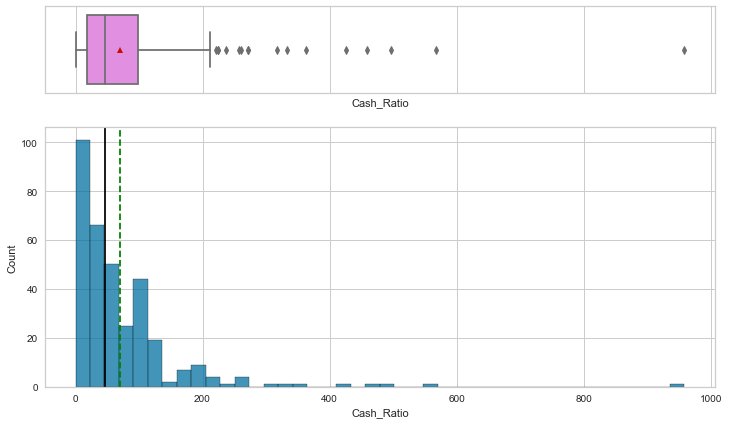

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Cash_Ratio")

* Cash Ratio has a heavily right skewed distribution. 
* The upper outlier is in the range of ~220 to ~900.
* We will make a decision how to handle outliers.

### Net cash flow

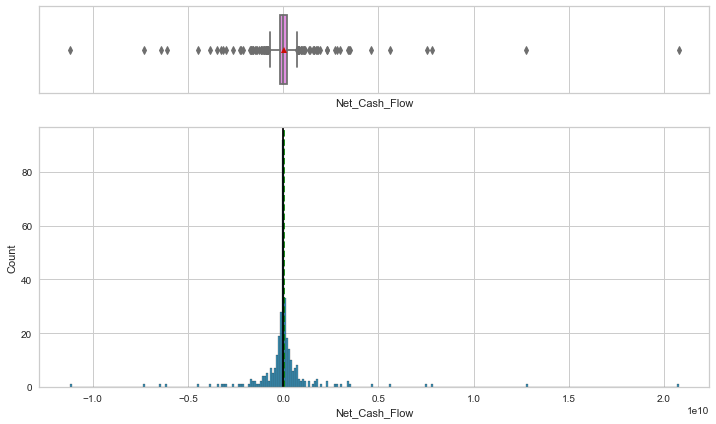

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Net_Cash_Flow")

* Net Cash Flow distribution very small range of 25% to 75%. 
* Mean and median are almost the same which is 0 dollars.
* The distribution has lots of outliers below lower whisher and above upper whisker.

### Net Income

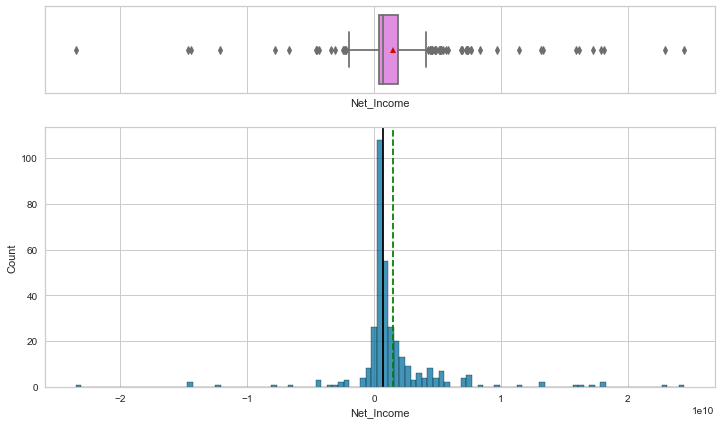

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Net_Income")

### Earning per share

ValueError: Could not interpret input 'Earning_per_share'

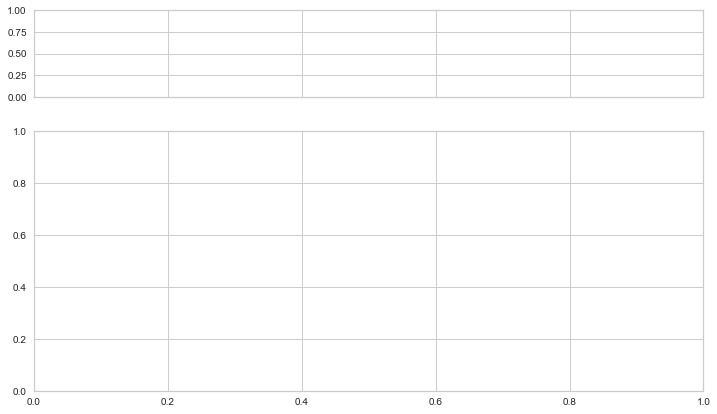

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Earning_per_share")

* `Price change` has a almost normal bell shape distribution with lots of outliers. Mean is slightly lower than median.
* `Volatility` has a great right skewed distribution with lots of outliers. Mean is higher than median.
* `ROE` has an extremely right skewed distribution with outliers. The highest outlier is over 900 and the upperwhisker is ~60, a very large range of outliers.
* `Cash Ratio` has a heavily right skewed distribution. The upper outlier is in the range of ~220 to ~900.
* `Net cash flow`
* `Net income`
* `Earning per share`
* `Estimated shares outstanding`
* `P/E ratio`
* `P/B ratio`

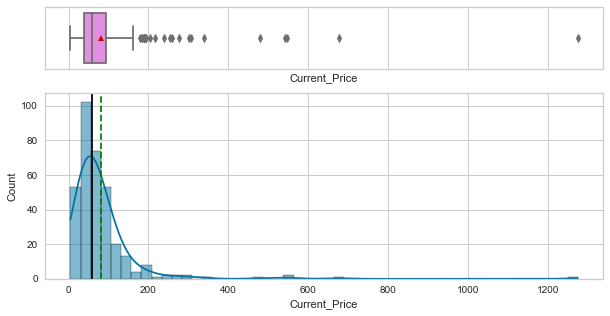

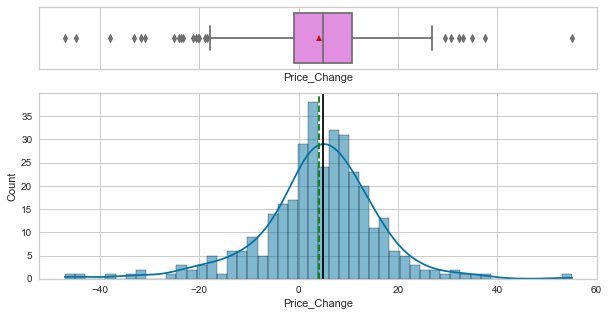

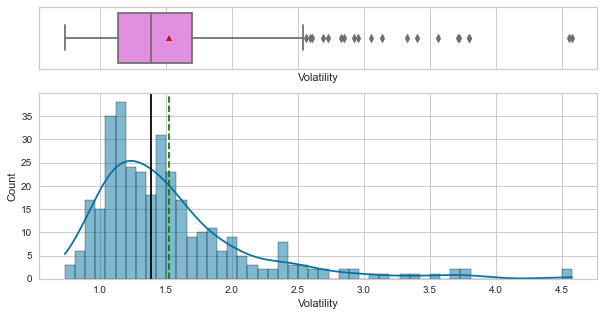

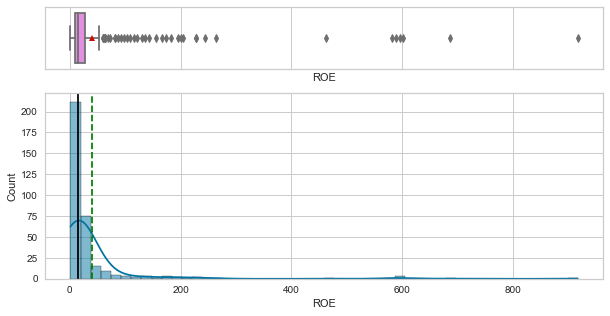

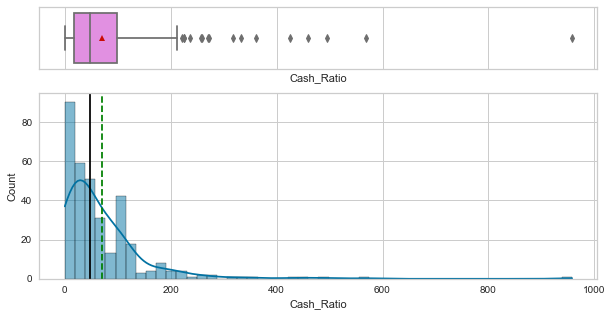

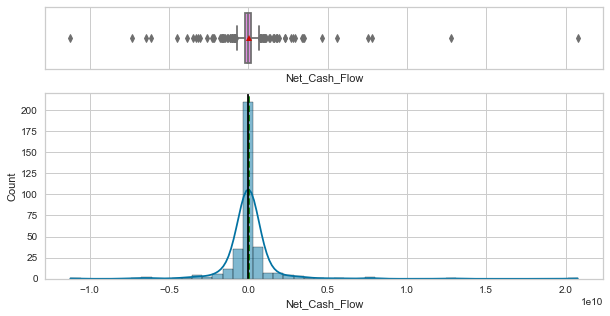

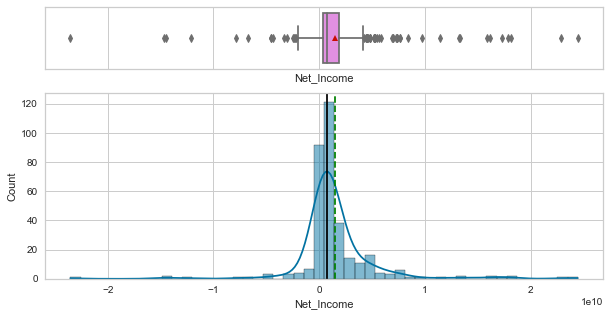

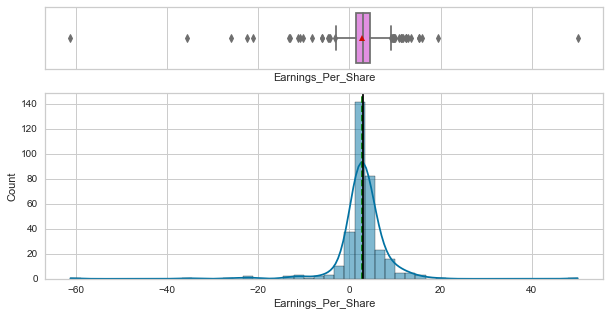

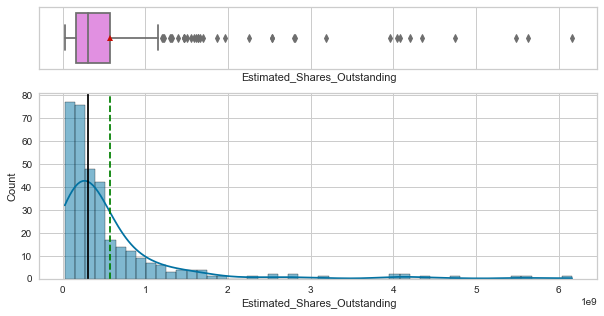

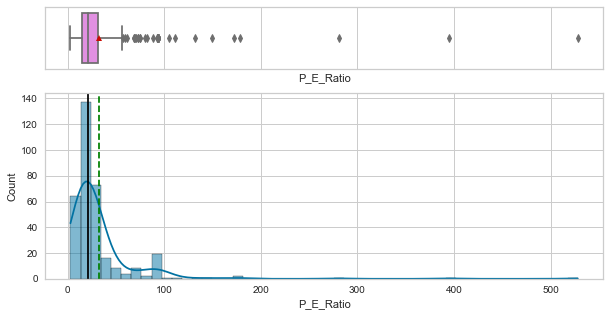

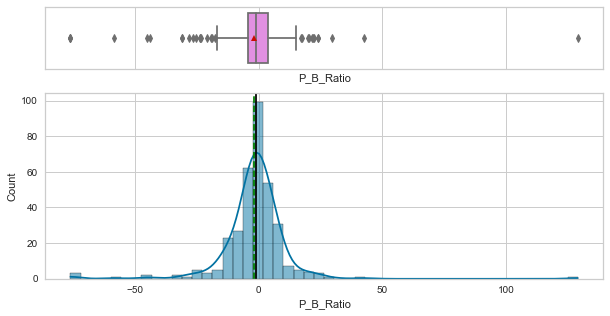

<IPython.core.display.Javascript object>

In [28]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

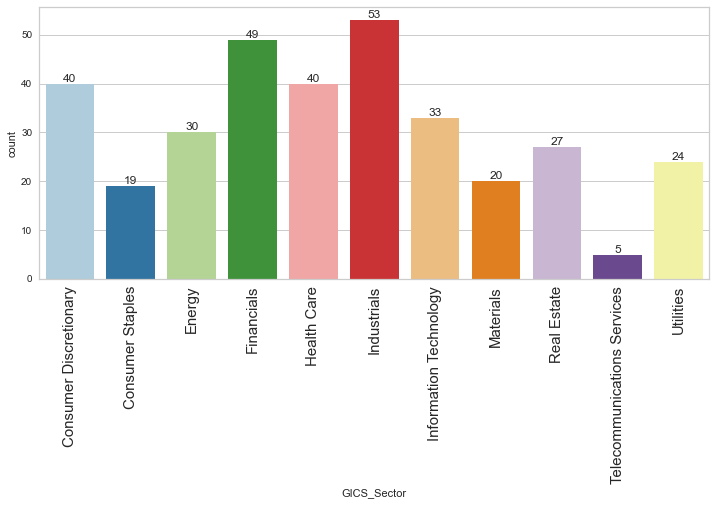

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "GICS_Sector")

* In this dataset, the top sectors by company counts are:
    * Industrials, 53 companies or 15.6%
    * Financials, 49 companies or 14.4%
    * Consumer Discretionary, 40 companies or 11.8%
    * Health Care, 40 companies or 11.8%

## Bivariate

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

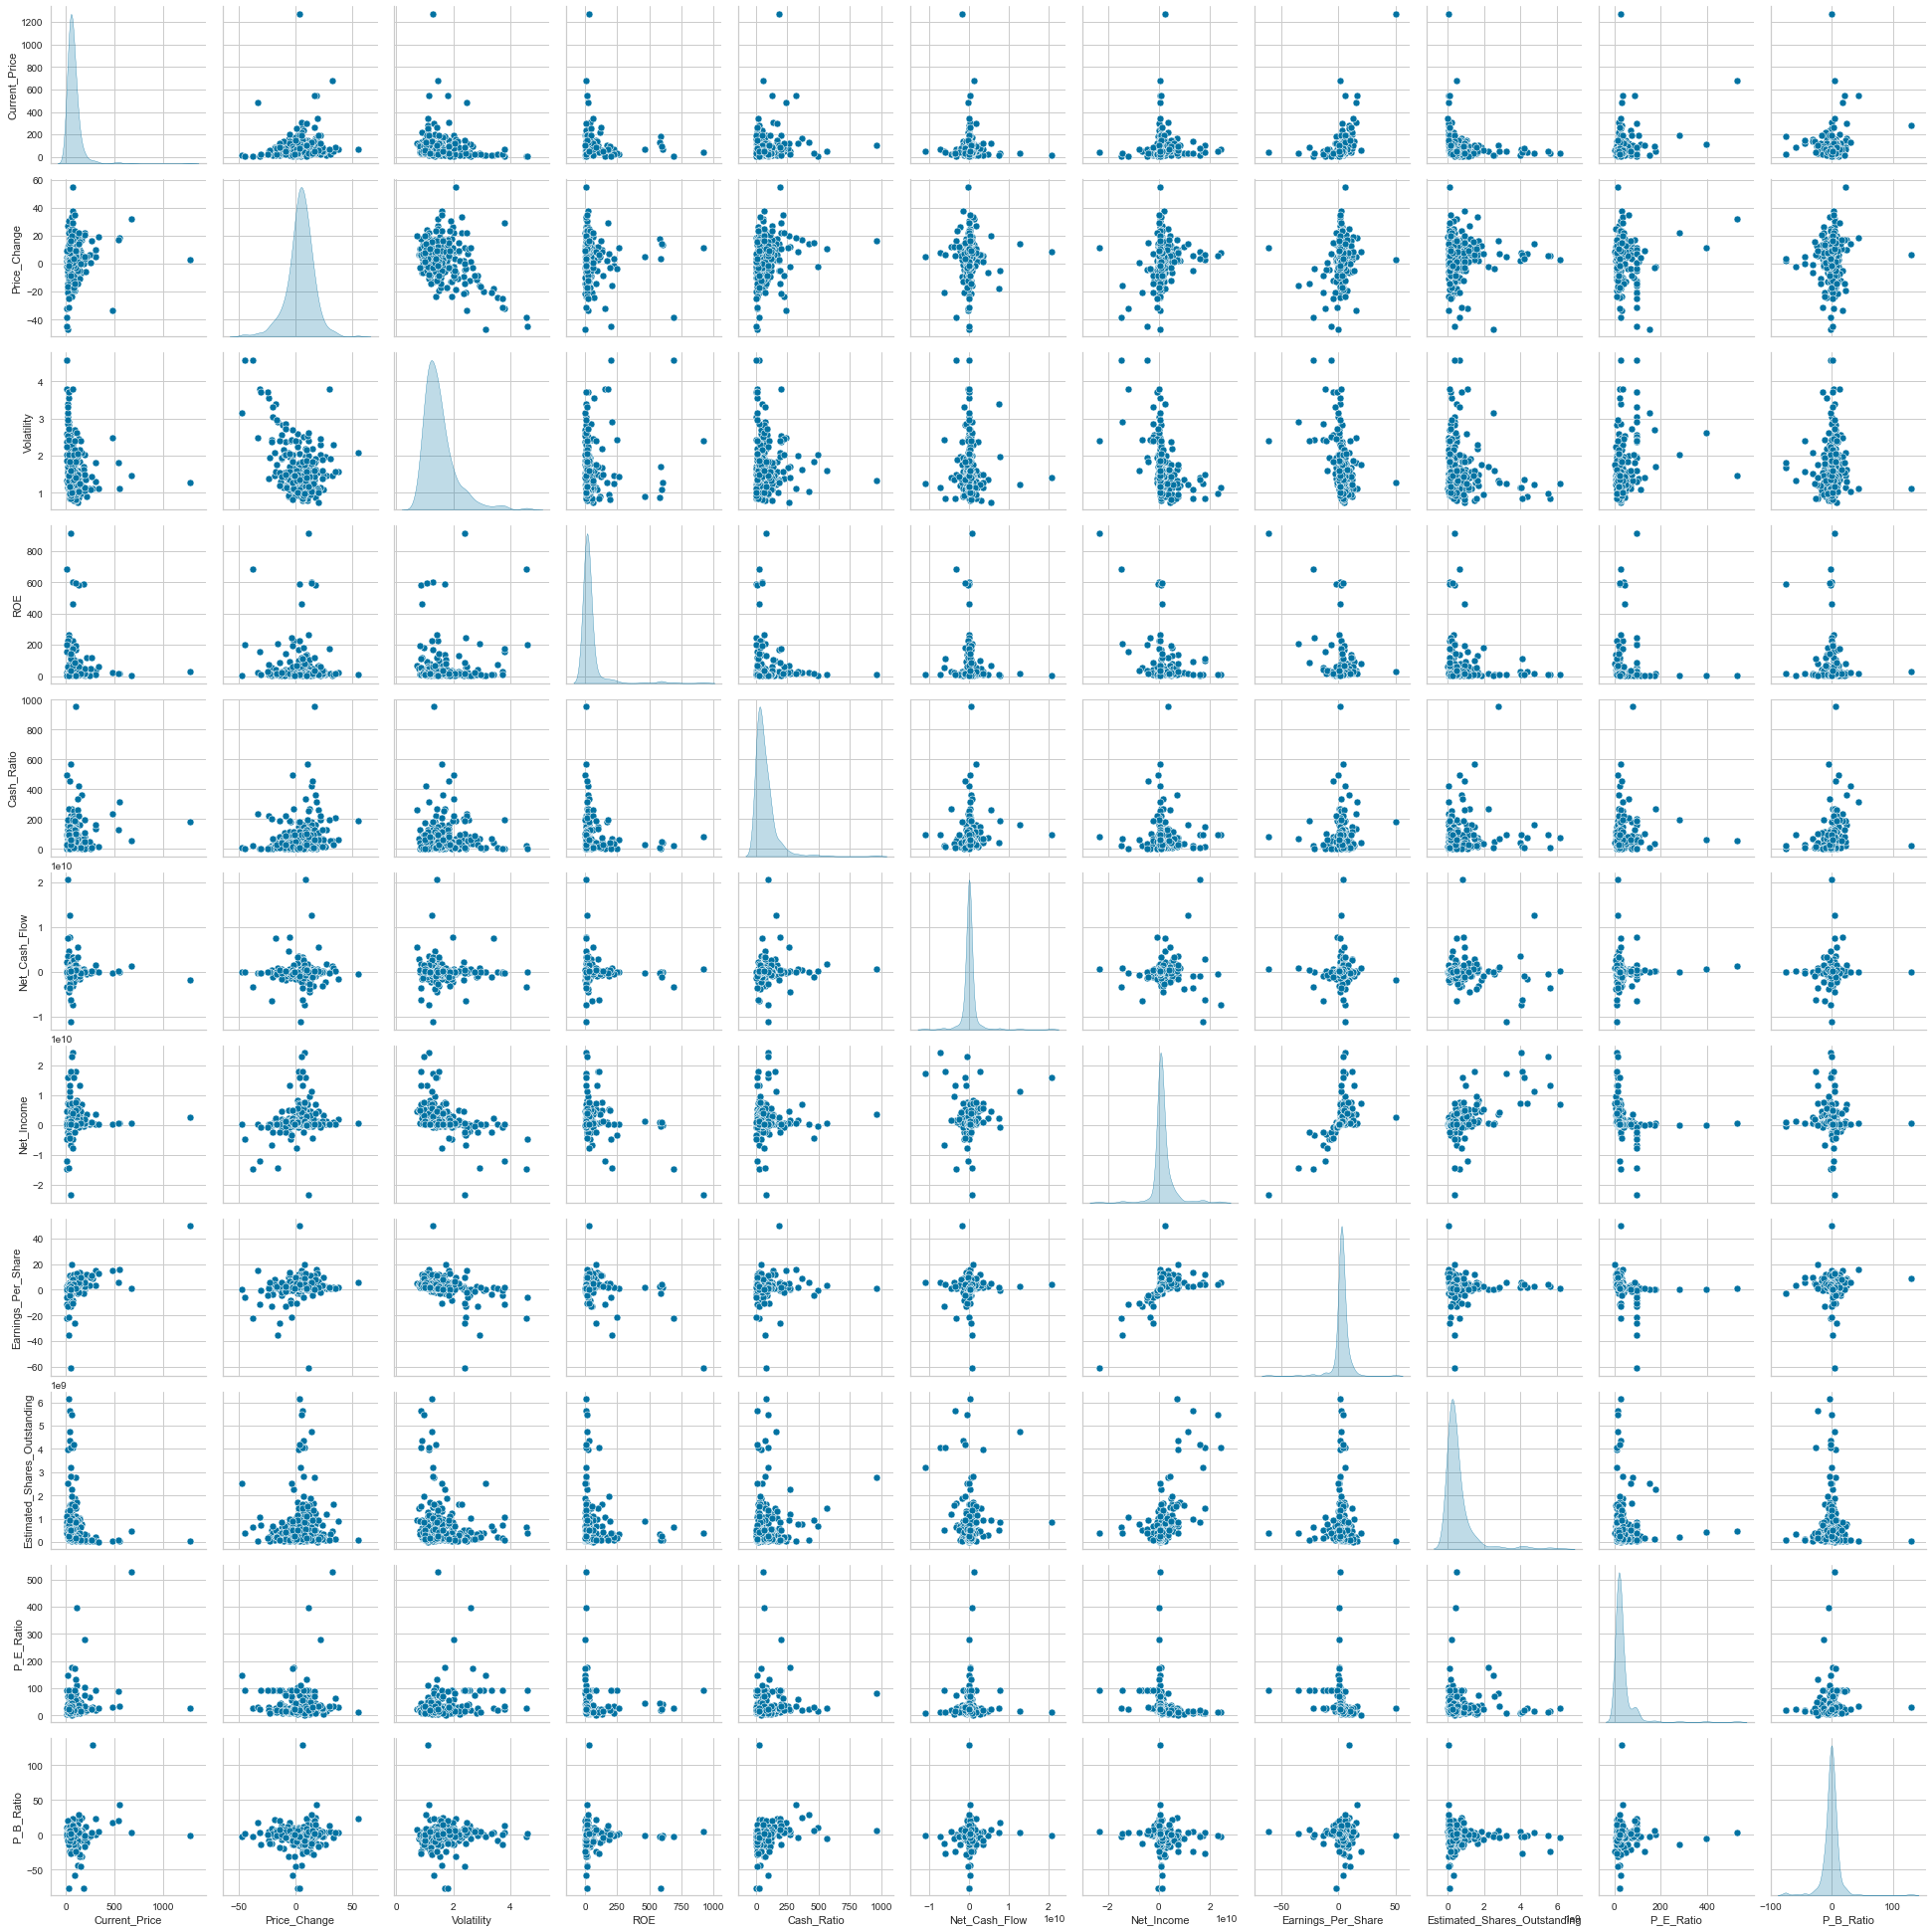

<IPython.core.display.Javascript object>

In [29]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

* The chart of net income and earnings per share shows that they seem to be correlated.
* PE Ratio seems to have a few peaks with one dominated peak. 
* Volatility and Price change, we can a pattern that they seems to be correlated.

### 3. How are the different variables correlated with each other?

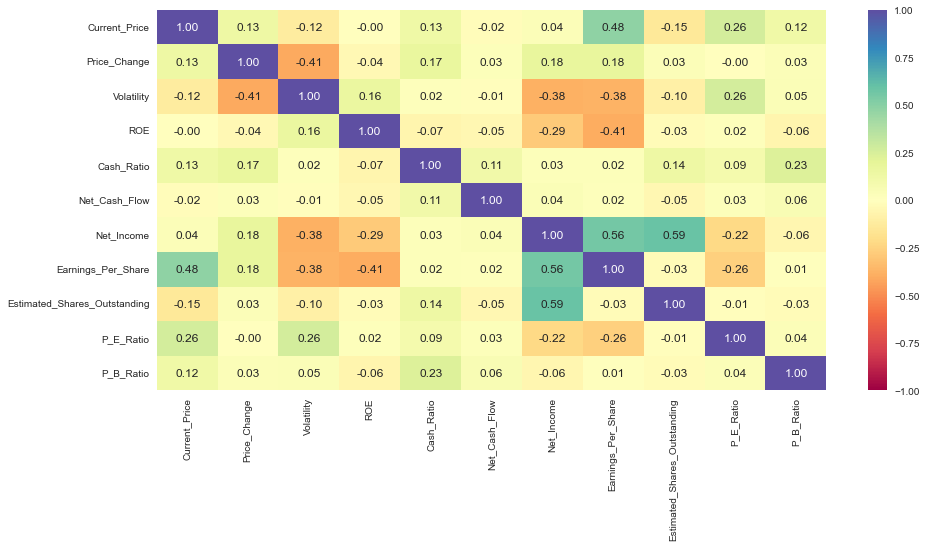

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Net income and Estimate Shares outstanding have the highest correlation at 0.59.
* Followed by Net income and earning per share at 0.56.
* Current price and Earning per share have 0.48 correlation
* Price change and Volatility have a negative correlation, at -0.41. 
* ROE and Earning per share have -0.41

<AxesSubplot:xlabel='GICS_Sector', ylabel='Current_Price'>

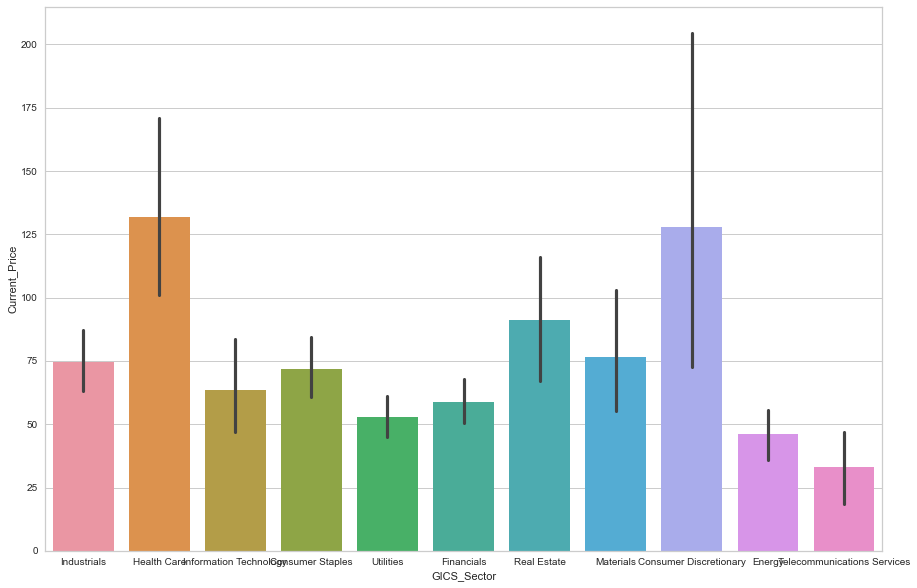

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Current_Price")

* Health Care has the highest current price on average, ~130 dollars.
* Followed by 3rd from last and Real Estate.
* Last is the lowest current price on average, ~30 dollars, followed by Energy ~48 dollars, and ~58 dollars.

### Price Change and GICS Sector

#### 2. The stocks of which economic sector have seen the maximum price increase on average?

<AxesSubplot:xlabel='GICS_Sector', ylabel='Price_Change'>

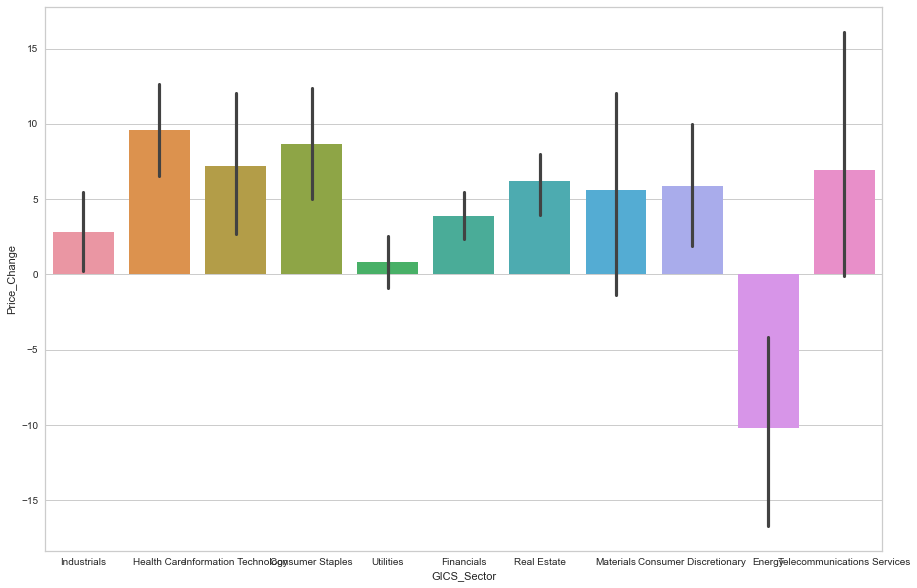

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Price_Change")

* Health care sector has maximum price increase on average, around 9 dollars.
* Followed by 4, 3, and last.
* Energy sector has negative price change on average. 

### GICS Sector and Volatility 

<AxesSubplot:xlabel='GICS_Sector', ylabel='Volatility'>

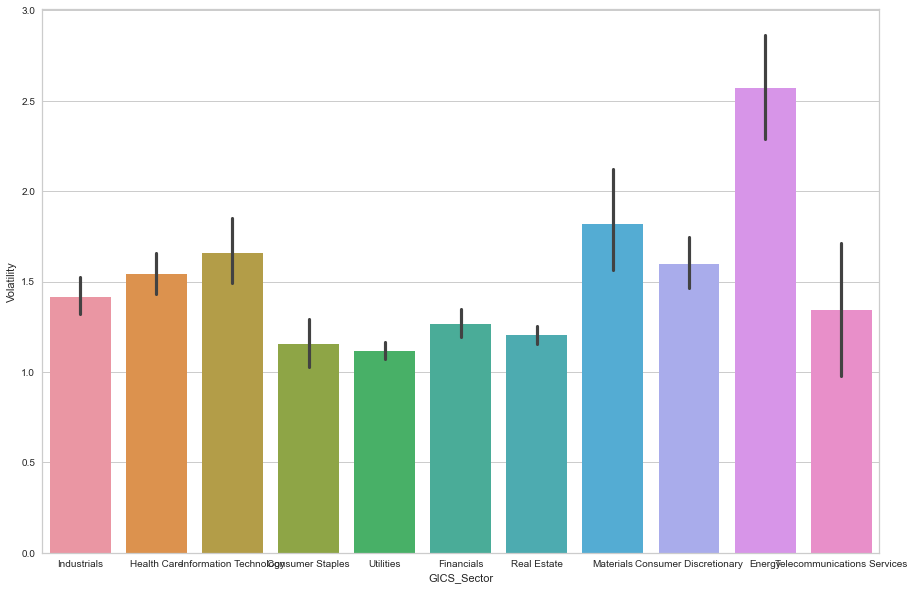

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Volatility")

* Energy sector has the highest number of its average volatility above 2.5. Followed by Materials, Real Estate, and Consumer Discretionary
* Utility sector has the lowest volalitity.

### Volatility and Price Change

<AxesSubplot:xlabel='Volatility', ylabel='Price_Change'>

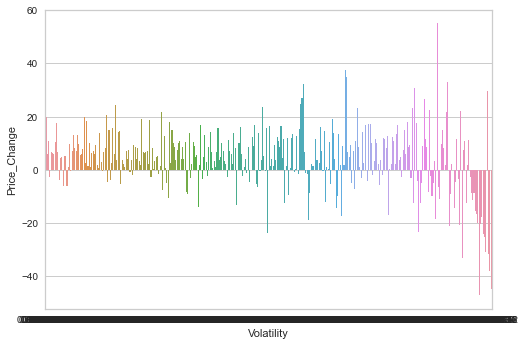

<IPython.core.display.Javascript object>

In [34]:
sns.barplot(data=df, x="Volatility", y="Price_Change")

### GICS Sector and ROE

<AxesSubplot:xlabel='GICS_Sector', ylabel='ROE'>

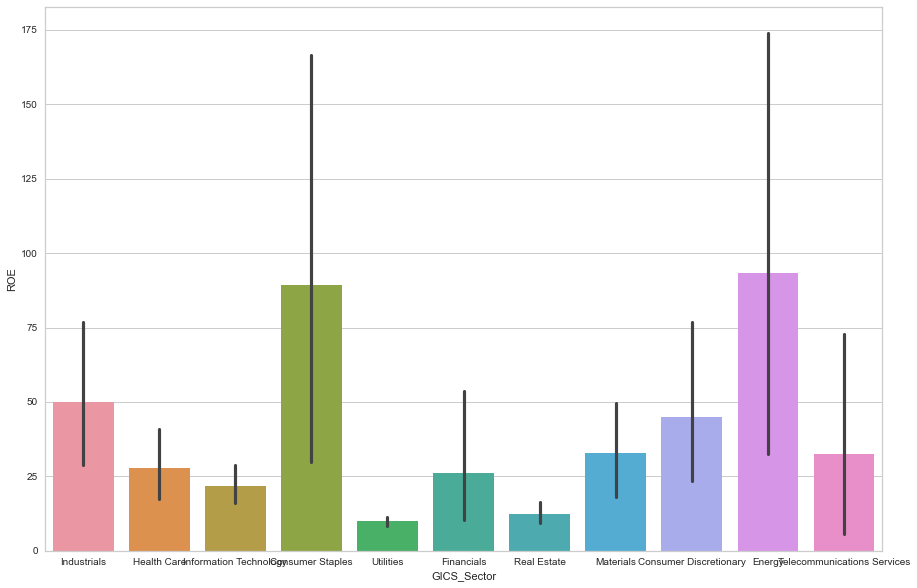

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="ROE")

* Energy has the highest ROE, on average ~90 with a range of 26 to 170, followed by Consumer Staples, on average 95 with a range of 30 to 174.
* Utilities 10, Real Estate 17, and Information Technology 23, have the least ROE in the order. 

### GICS Sector and Cash Ratio

#### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

<AxesSubplot:xlabel='GICS_Sector', ylabel='Cash_Ratio'>

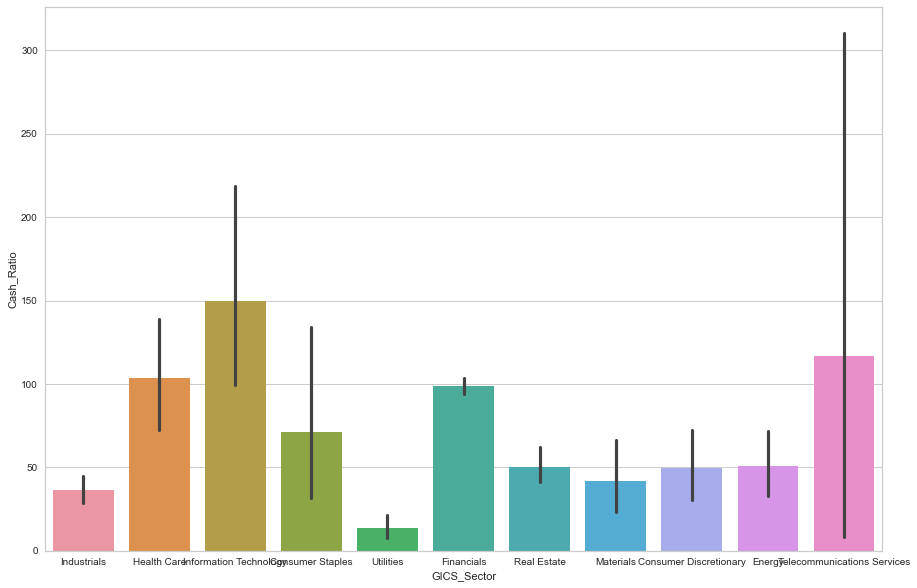

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Cash_Ratio")

* The sector that has the most cash ratio, 150, is Information Technology.
* Followed by Communicaton Services at 120. However, it also has the largerst range for cash ratio within its sector from ~5 to ~300. It indicates that some companies may not have enough cash to pay off their liabilities in the short term and some companies have a lot of cash sitting.
* Follwed by Health care over 100 and Fiancials ~100. 
* The sectors that have the lowest, less than 50 , cash ratio are Utilities, Industrial, and  Materials.

### GICS Sector and Net Cash Flow

<AxesSubplot:xlabel='GICS_Sector', ylabel='Net_Cash_Flow'>

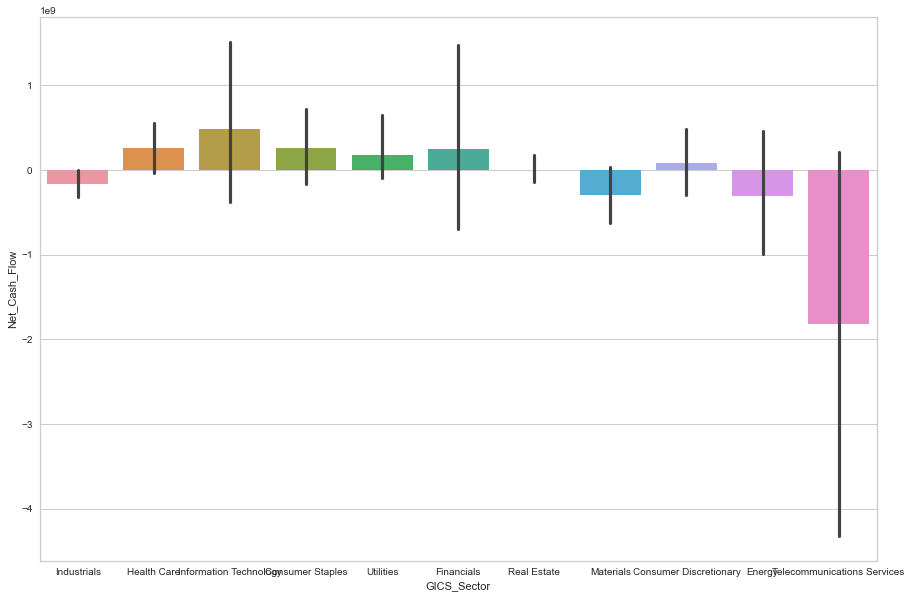

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Net_Cash_Flow")

* For net cash flow, Communication sector has significantly low number than the rest. Companies in this sector have less income than expenses. 
* The other negative net cash flow sectors are Industrials, Materials, and Energy.
* Real Estate has Net cash flow nearly 0.
* The highest Net cash flow are Information and Technology, Health Care, and Consumer Staples.

### GICS Sector and Net Income

<AxesSubplot:xlabel='GICS_Sector', ylabel='Net_Income'>

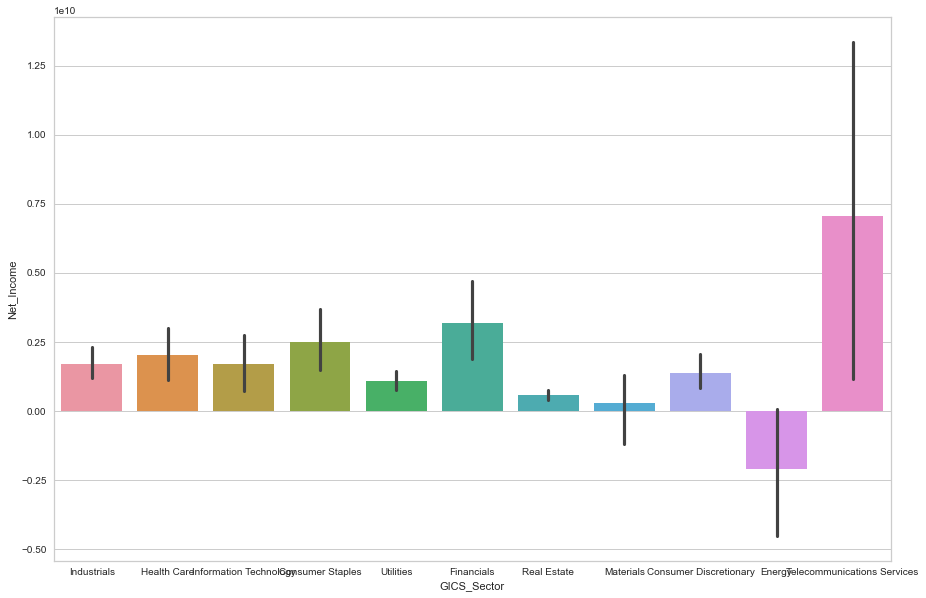

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Net_Income")

* Communications Services has the significantly higer than the rest of sectors.  However, its Net Income reversed with its Net Cash Flow. 
* Energy has negative Net Income.
* The rest of sectors have positive Net Income.
* Financials has the highest Net Income, followed by Consumer Staples, and Health Care.

### GICS Sector and Earning Per Share

<AxesSubplot:xlabel='GICS_Sector', ylabel='Earnings_Per_Share'>

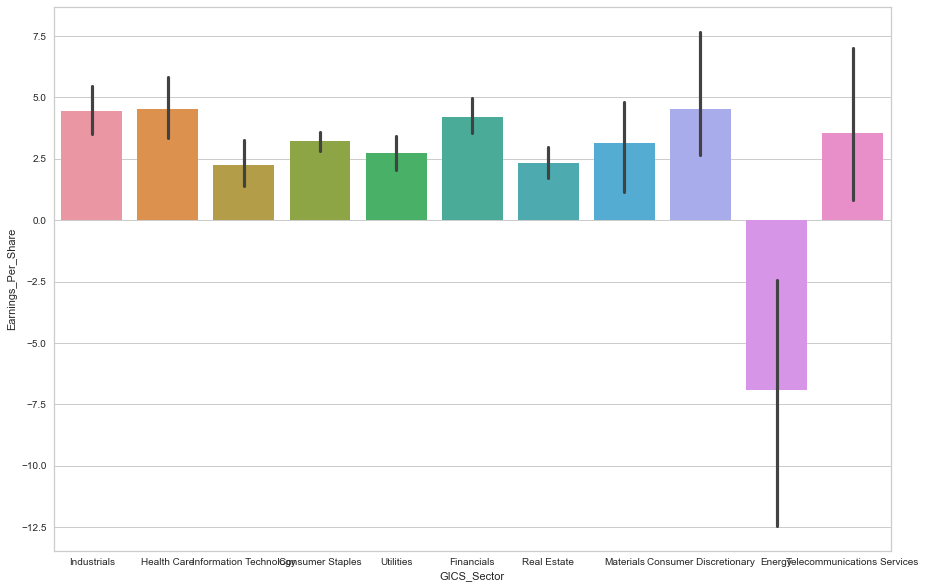

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Earnings_Per_Share")

* Energy Sector is only sector which has negative Earning per share. The average is ~ -7 dollars and the lowest is ~-12.5 dollars.
* The rest of sectors have positive earning per share.
* Comsumer Discretionary, Health Care, and Industrials are the top 3 at over 4 dollars.

### GICS Sector and Estimated Shares Outstanding

<AxesSubplot:xlabel='GICS_Sector', ylabel='Estimated_Shares_Outstanding'>

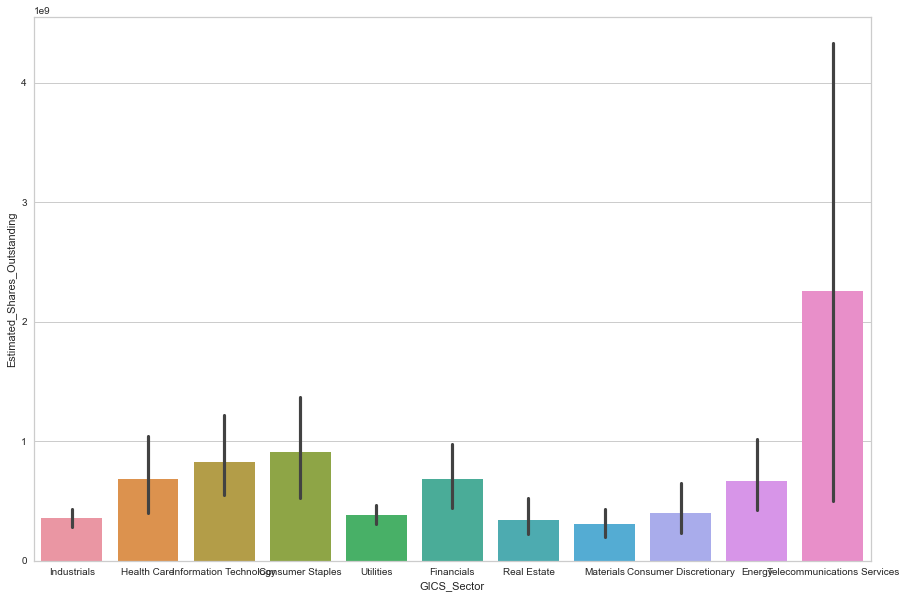

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="Estimated_Shares_Outstanding")

* Communication Services sector has the highest Estimated Shares Outstanding. It's significantly higher than the rest of sectors.
* Followed by Consumer Staples and Information Technology.
* The lest Estimated Shares Outstanding is Materiala, Real Estate, and Industrials.

### GICS Sector and P/E Ratio

### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

<AxesSubplot:xlabel='GICS_Sector', ylabel='P_E_Ratio'>

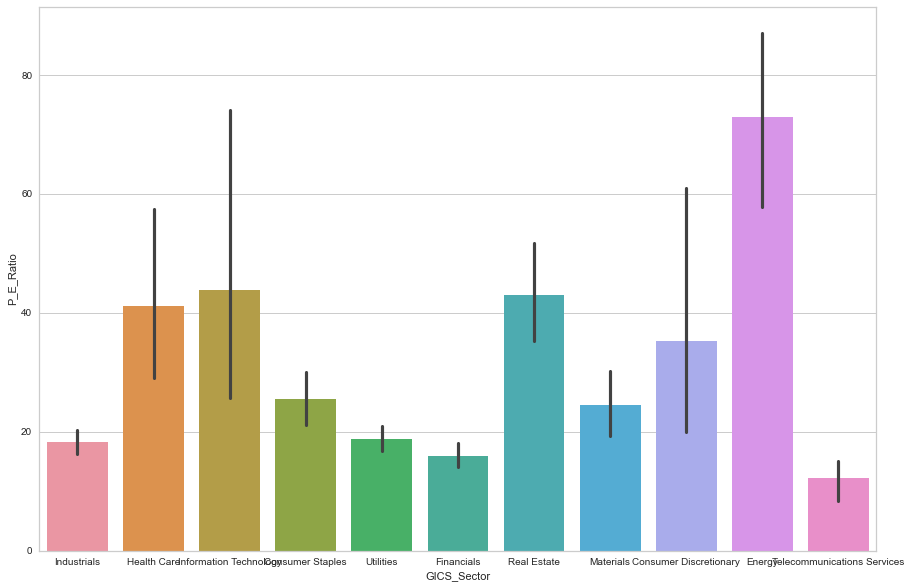

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="P_E_Ratio")

* Energy sector has the highest P/E number, in average over 70 P/E ratio.
* Followed by Information Technology, Real Estate, and Health Care.
* The lowest P/E ratio are Communcation Services, Financials, Industrials and Utilities.

### GICS Sector and P/B Ratio

<AxesSubplot:xlabel='GICS_Sector', ylabel='P_B_Ratio'>

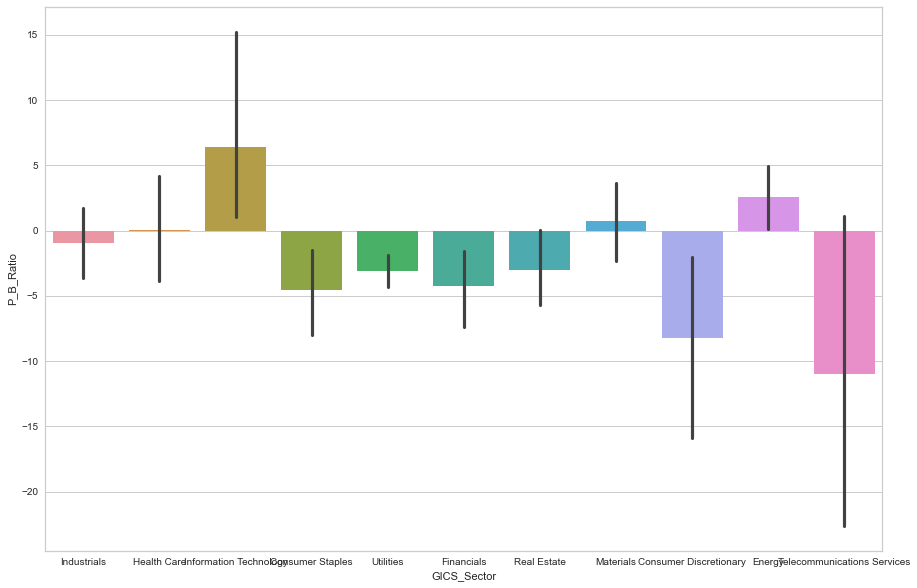

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="GICS_Sector", y="P_B_Ratio")

NOTE: Even though Energy Sector has negative Net Income, low Cash ratio, negative earning per share, the highest Volatility, and negative price change in the last 23 months, investors are still willing to invest in a single share of a company per dollar of its earnings.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

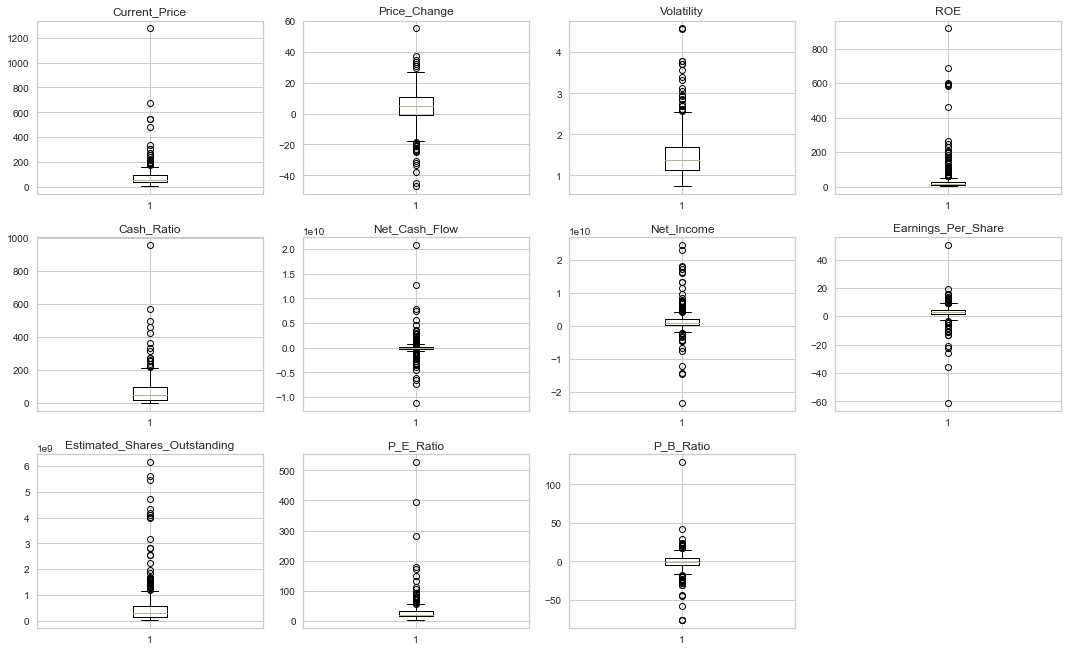

<IPython.core.display.Javascript object>

In [43]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
# numeric_columns.remove("release_year")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All features have outliers. 
* We will explore outliers that have values a lot more than the rest.

In [44]:
outlier_cprice = pd.DataFrame(df[df["Current_Price"] > 800])
outlier_cprice

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
243,Priceline.com Inc,Consumer Discretionary,1274.949951,3.190527,1.26834,29,184,-1671386000,2551360000,50.09,50935516.07,25.453183,-1.052429


<IPython.core.display.Javascript object>

* There are 5 stocks that have current price higher than 400 dollars.
* Three of them are in Consumer Discretionary and two of them are in Health Care.
* Since there are only 5 stocks that have current price over 400 dollars, we will keep data as it's.

In [45]:
outlier_pchange = pd.DataFrame(df[df["Price_Change"] > 40])
outlier_pchange

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
136,First Solar Inc,Information Technology,65.989998,55.051683,2.075216,10,190,-355228000,546421000,5.42,100815682.7,12.175276,22.563791


<IPython.core.display.Javascript object>

In [46]:
outlier_v = pd.DataFrame(df[df["Volatility"] > 4])
outlier_v

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
62,Chesapeake Energy,Energy,4.50,-38.101788,4.559815,687,22,-3283000000,-14685000000,-22.43,654703522.1,28.407929,-1.840528
284,Southwestern Energy,Energy,7.11,-44.798137,4.580042,200,2,-38000000,-4556000000,-6.07,402141680.4,93.089287,1.273530


<IPython.core.display.Javascript object>

In [47]:
outlier_ROE = pd.DataFrame(df[df["ROE"] > 800])
outlier_ROE

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
30,Apache Corporation,Energy,44.470001,11.397804,2.405408,917,80,698000000,-23528000000,-61.2,384444444.4,93.089287,4.970809


<IPython.core.display.Javascript object>

In [48]:
outlier_cashr = pd.DataFrame(df[df["Cash_Ratio"] > 600])
outlier_cashr

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
125,Facebook,Information Technology,104.660004,16.22432,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467


<IPython.core.display.Javascript object>

In [49]:
outlier_netcf = pd.DataFrame(df[df["Net_Cash_Flow"] > 20000000000])
outlier_netcf

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
40,Bank of America Corp,Financials,16.83,8.440722,1.418688,6,99,20764000000,15888000000,4.18,845069512.2,13.004785,-0.938007


<IPython.core.display.Javascript object>

In [50]:
outlier_pe = pd.DataFrame(df[df["P_E_Ratio"] > 200])
outlier_pe

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
19,Alexion Pharmaceuticals,Health Care,190.750000,22.338380,2.022921,2,195,66000000,144000000,0.68,211764705.9,280.514706,-14.171389
26,Amazon.com Inc,Consumer Discretionary,675.890015,32.268105,1.460386,4,58,1333000000,596000000,1.28,465625000.0,528.039074,3.904430
226,Netflix Inc.,Information Technology,114.379997,11.145654,2.605949,6,65,695722000,122641000,0.29,422900000.0,394.413783,-5.700168


<IPython.core.display.Javascript object>

In [51]:
outlier_pb = pd.DataFrame(df[df["P_B_Ratio"] > 100])
outlier_pb

,Security,GICS_Sector,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
6,Alliance Data Systems,Information Technology,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,66951851.85,31.040405,129.064585


<IPython.core.display.Javascript object>

### Observations:
* All outliers with extreme values are from different companies. 
* Number of extreme outliers per each feature is very low, range from 1-3. 
* We decided to treat extreme outliers with the the lower outliers values instead of median, so those companies still be interpretated as if they have those extreme values. 

In [52]:
df.loc[df["Current_Price"] > 600, "Current_Price"] = 600
df.loc[df["Price_Change"] > 40, "Price_Change"] = 40
df.loc[df["Volatility"] > 4, "Volatility"] = 4
df.loc[df["ROE"] > 800, "ROE"] = 800
df.loc[df["Cash_Ratio"] > 800, "Cash_Ratio"] = 800
df.loc[df["Net_Cash_Flow"] > 15000000000, "Net_Cash_Flow"] = 15000000000
df.loc[df["P_E_Ratio"] > 300, "P_E_Ratio"] = 300
df.loc[df["P_B_Ratio"] > 50, "P_B_Ratio"] = 50
df.loc[df["P_B_Ratio"] < -50, "P_B_Ratio"] = -50

<IPython.core.display.Javascript object>

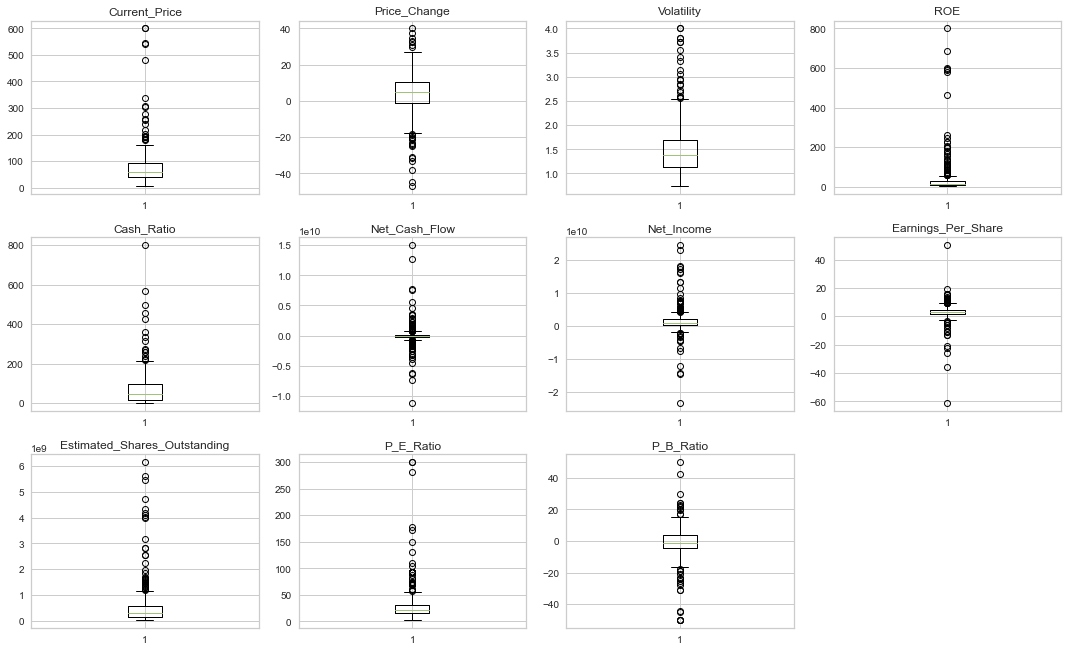

<IPython.core.display.Javascript object>

In [53]:
# rechecking outliers
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Feature scaling

In [54]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Security", "GICS_Sector"], axis=1)),
    columns=df.drop(["Security", "GICS_Sector"], axis=1).columns,
)
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P_E_Ratio,P_B_Ratio
0,-0.471363,0.504442,0.286109,1.024734,-0.215744,-0.360770,1.554415,1.309399,0.107863,-0.783017,-0.644190
1,-0.252067,0.364039,1.174266,0.971221,0.086503,0.006970,0.927628,0.056755,1.250274,-0.360263,-0.641087
2,-0.438125,0.614455,-0.432966,-0.195352,-0.029746,0.504964,0.744371,0.024831,1.098021,-0.459193,0.118193
3,0.198470,0.840722,-0.286835,-0.323782,1.283863,-0.156879,-0.219816,-0.230563,-0.091622,1.201771,0.535622
4,-0.302963,-0.495625,0.310485,-0.270270,2.353350,0.155257,-0.202703,-0.374982,1.978399,4.112829,0.250313


<IPython.core.display.Javascript object>

## Clustering

## K-means Clustering

* We will try 1-9 number for k.

In [ ]:
# to compute distances
from scipy.spatial.distance import cdist

In [ ]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**There is no obvious elbow point. The points that could work are 3, 4, 0r 6.**

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 or 5 a good value of k.**

**We will create Silhouette Plot of KMeans which k = 3, 4, 5, 6, and 7.**

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 6 as the appropriate no. of clusters as the silhouette score is highest enough and there is knick at 5 in the elbow curve.**

### K=5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

In [ ]:
# create a copy of dataframe to avoid any changes in df
df1 = df.copy()

In [ ]:
# adding kmeans cluster labels to the original dataframe
df1["K_means_segments"] = kmeans.labels_

In [ ]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Price_Change"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# Let us first start with K = 5
final_model = KMeans(5)
final_model.fit(subset_scaled_df)
prediction = final_model.predict(subset_scaled_df)

# Append the prediction
subset_scaled_df["GROUP"] = prediction
subset_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
subset_scaled_df.head()

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 6
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
## Note group 0 stable with little change in price. Price are low. Low volatility. Low ROE with healthy cash ratio. Low risk.
## group 1 risky, new company with lots of inovation or new techmogy being built.
## group 2 well established with has the highest stock price with positive

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)  # checking the amount of variance explained
pca.explained_variance_ratio_.sum()

The first two principal components explain 37.35% of the variance in the data.

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

## Cluster Profiling

In [ ]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("K_means_segments")["Price_Change"].count().values
)

In [ ]:
# let's see the names of the name of companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

## K = 6

In [ ]:
df2 = df.copy()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df2["K_means_segments"] = kmeans.labels_

In [ ]:
cluster_profile2 = df2.groupby("K_means_segments").mean()

In [ ]:
cluster_profile2["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Price_Change"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# Let us first start with K = 6
final_model = KMeans(6)
final_model.fit(subset_scaled_df)
prediction = final_model.predict(subset_scaled_df)

# Append the prediction
subset_scaled_df["GROUP"] = prediction
subset_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
subset_scaled_df.head()

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[num_cols[counter]], x=df2["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Hierarchical Clustering

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(subset_scaled_df, metric="euclidean", method="average")
c, coph_dists = cophenet(Z, pdist(subset_scaled_df))

c

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="Mahalanobis", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* The cophenetic correlation is highest for average linkage methods.
* We will move ahead with average linkage.
* appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [ ]:
HCmodel = AgglomerativeClustering(
    n_clusters=6, affinity="euclidean", linkage="centroid"
)
HCmodel.fit(subset_scaled_df)

In [ ]:
subset_scaled_df[""] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling 

In [ ]:
cluster_profile = data.groupby("Securityl").mean()

In [ ]:
cluster_profileTS["count_in_each_segments"] = (
    df.groupby("Security")["Price_Change"].count().values
)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

- 